# Modeling class Probabilities via Logistic Regression


## Logistic regression intuition and conditional probabilities

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. Logistic Regression is a linear model for binary classification that can be extended to multiclass classification, for example, via the OvR technique.

To explain the idea behind logistic regression as a probabilistic model, let's first introduce the **odds ratio**: the odds in favor of a particular event. The odds ratio can be written as $\frac{p}{1 - p}$ where $p$ stands for the probability of the positive event. The term positive event does not necessarily mean good, but refers to the event that we want to predict. We can then further define the *logit* function, which is simply the logarithm of the odds ratio (log-odds):

\begin{equation*}
logit\left( p\right) = \log \frac{p}{\left( 1 - p\right)}
\end{equation*}

The logit function takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range, which we can use to express a linear relationship between feature values and the log-odds:

\begin{equation*}
logit \left( p \left( y = 1|x \right) \right) = w_0x_0 + w_1x_1 + \dots + w_mx_x = \sum_{i=0}^m w_ix_i = w^T x
\end{equation*}

Here, $p \left( y=1|x \right)$ is the conditional probability that a particular sample belongs to class 1 given its features **x**.

Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the *logit* function. It is also called logistic sigmoid function, sometimes simply abbreviated to sigmoid function due to its characteristic S-shape:

\begin{equation*}
\phi \left( z \right) = \frac{1}{1 + e^{-z}}
\end{equation*}

Here z is the net input, the linear combination of weights and sample features,

\begin{equation*}
z = w^T x = w_0x_0 + w_1x_1 + \dots + w_mx_m
\end{equation*}

Let's see the function

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

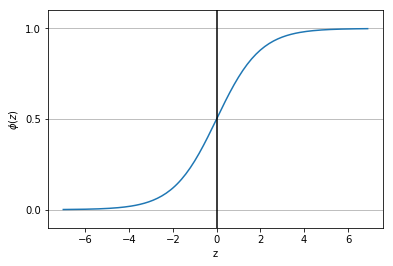

In [2]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis thicks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

We conclude that this sigmoid function takes real number values as input and transforms them into values in the range $[0, 1]$ with an intercept at $\phi \left( z\right) = 0.5$.

In Adaline, we used the identity function $\phi \left( z \right) = z$ as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier. The difference between Adaline and logistic regression is illustrated in the following figure:

<img src="images/adaline_lg_differences.jpg" height="200" width="350">

The output of the sigmoid function is then interpreted as the probability of a particular sample belonging to class 1, $\phi \left( z \right) = P \left( y = 1 | x; w \right)$, given its features **x** parameterized by the weights **w**.

The predicted probability can then simply be converted into a binary outcome via a threshold function:

\begin{equation*}
\hat{y} = \left\{ \begin{matrix}
1 & \text{if } \phi \left( z \right) \geq 0.5 \\
0 & \text{ otherwise}
\end{matrix} \right.
\end{equation*}

If we look at the preceding plot of the sigmoid function, this is equivalent to the following:

\begin{equation*}
\hat{y} = \left\{ \begin{matrix}
1 & \text{if } z \geq 0.0 \\
0 & \text{ otherwise}
\end{matrix} \right.
\end{equation*}

The application of Logistic Regression includes weather forecasting and to predict diseases in pacients.

## Learning the weights of the logistic cost function

Let us briefly talk about how we fit the parameters of the model, for instance the weights **w**. Previously, we defined the sum-squared-error cost function as follows:

\begin{equation*}
j \left( w \right) = \sum_i \frac{1}{2} \left( \phi \left( z^{(i)} \right) - y^{(i)} \right)^2
\end{equation*}

To explain how we can derive the cost function for logistic regression, let's first define the likelihood L that we want to maximize when we build a logistic regression model, assuming that the individual samples in our dataset are independent of one another. The formula is as follows:

\begin{equation*}
L \left( w \right) = P \left( y|x;w \right) = \prod_{i=1}^n P \left( y^{(i)} | x^{(i)};w \right) = \prod_{i=1}^n \left( \phi \left( z^{(i)} \right) \right)^{y^{(i)}} \left( 1 - \phi \left( z^{(i)} \right) \right)^{1-y^{(i)}}
\end{equation*}

In practice, it is easier to maximize the (natural) log of this equation, which is called the log-likelihood function:

\begin{equation*}
l \left( w \right) = \log{}L \left( w \right) = \sum_{i=1}^n \left[ y^{(i)} \log{ \left( \phi \left( z^{(i)} \right) \right)} + \left( 1 - y^{(i)} \right) \log{\left( 1 - \phi \left( z^{(i)} \right) \right)} \right]
\end{equation*}

Firstly, applying the log function reduces the potential for numerical underflow, which can occur if the likelihoods are very small. Secondly, we can convert the product of factors into a summation of factors, which makes it easier to obtain the derivative of this function via the addition trick.

Now we could use an optimization algorithm such as gradient ascent to maximize this log-likelihood function. Alternatively, let's rewrite the log-likelihood as a cost function J that can be minimized using gradient descent.

\begin{equation*}
J \left( w \right) = \sum_{i=1}^n \left[ -y^{(i)} \log{\left( \phi \left( z^{(i)} \right) \right)} - \left(1 - y^{(i)} \right) \log{\left(1 - \phi \left( z^{(i)} \right) \right)} \right]
\end{equation*}

To get a better grasp of this cost function, let us take a look at the cost that we calculate for one single-sample training instance:

\begin{equation*}
J \left( \phi \left( z \right), y; w \right) = -y \log{\left( \phi \left( z \right) \right)} - \left( 1 - y \right) \log{\left( 1 - \phi \left(z \right) \right)}
\end{equation*}

Looking at the equation, we can see that the first term becomes zero if $y = 0$, and the second term becomes zero if $y = 1$:

\begin{equation*}
J \left( \phi \left( z \right), y; w \right) = \left\{
\begin{matrix}
-\log{\left( \phi \left(z \right) \right)} & \text{ if } y = 1 \\
-\log{\left( 1 -  \phi \left(z \right) \right)} & \text{ if } y = 0 \\
\end{matrix}
\right.
\end{equation*}

Let's write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $\phi \left( z \right)$:

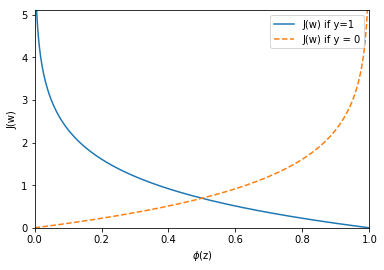

In [3]:
def cost_1(z):
    return -np.log(sigmoid(z))


def cost_0(z):
    return -np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]

plt.plot(phi_z, c0, linestyle='--', label='J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly predict $y = 0$ (dashed line). However, if the prediction is wrong, the cost goes towards infinity. The main point is that we penalize wrong predictions with an increasingly larger cost.

## Converting an Adaline implementation into an algorithm for logistic regression

We could simply substitute the cost function J in our Adaline implementation, with the new cost function:

\begin{equation*}
J \left( w \right) = - \sum_i y^{(i)} \log{\left( \phi \left( z^{(i)} \right) \right)} + \left(1 - y^{(i)} \right) \log{\left( 1 - \phi \left( z^{(i)} \right) \right)}
\end{equation*}

We use this to compute the cost of classifying all training samples per epoch. Also, we need to swap the linear activation function with the sigmoid activation and change the threshold function to return class labels 0 and 1 instead of -1 and 1.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

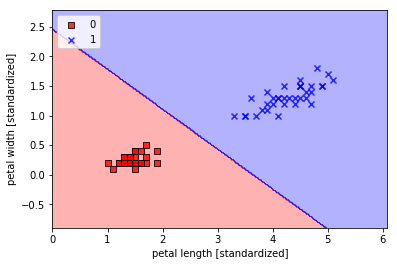

In [5]:
from plot_regions import plot_decision_regions
from logistic_regression_gd import LogisticRegressionGD

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(x=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## logistic regression using with scikit-learn

let's learn how to use scikit-learn's more optimized implementation of logistic regression that also supports multi-class settings off the shelf (OvR by default). 

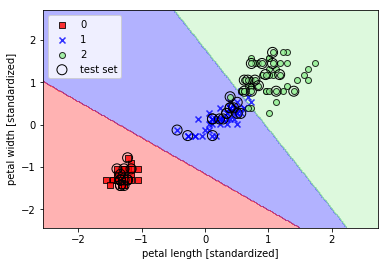

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# prepare data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='auto')
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# After fitting the model on the training data, we plotted the decision regions, training samples, and test samples,
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

"What is this mysterious parameter C?". Before answer it, et's finish our discussion of class-membership probabilities. The probability that training examples belong to a certain class can be computed using the predict_proba method. For example, we can predict the probabilities of the first three samples in the test set as follows:

In [13]:
# lr.predict_proba(X_test_std[:3, :])
# lr.predict_proba(X_test_std[:3, :]).sum(axis=1) # to confirm the sum
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)  # predict the class by the largest column

array([2, 0, 0])

In [14]:
lr.predict(X_test_std[:3, :]) # the same, but using predict

array([2, 0, 0])

In [9]:
# warning: if you want to predict the class label of a single flower sample: scikit-learn expects a two-dimensional array as data input
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

## Tackling overfitting via regularization

Overfitting is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffers from overfitting, we also say that the model has a high variance, which can be caused by having too many parameters that lead to a model that is too complex given the underlying data. Similarly, our model can also suffer from underfitting (high bias), which means that our model is not complex enough to capture the pattern in the training data well and therefore also suffers from low performance on unseen data.

Although we have only encountered linear models for classification so far, the problem of overfitting and underfitting can be best illustrated by comparing a linear decision boundary to more complex, nonlinear decision boundaries as shown in the following figure:

<img src="images/overfitting_underfitting.jpg" height="200" width="350">

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter (weight) values. The most common form of regularization is so-called L2 regularization (sometimes also called L2 shrinkage or weight decay), which can be written as follows:

\begin{equation*}
\frac{\lambda}{2} \| w \| = \frac{\lambda}{2} \sum_{j=1}^m w_j^2
\end{equation*}

Here, $\lambda$ is the so-called regularization parameter.

The cost function for logistic regression can be regularized by adding a simple regularization term, which will shrink the weights during model training:

\begin{equation*}
J \left( w \right) = \sum_{i=1}^n \left[ -y^{(i)} \log{\left( \phi \left( z^{(i)} \right) \right)} - \left( 1 - y^{(i)} \right) \log{\left( 1 - \phi \left( z^{(i)} \right) \right)} \right] + \frac{\lambda}{2} \| w \|^2
\end{equation*}

Via the regularization parameter $\lambda$, we can then control how well we fit the training data while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength.

The term C is directly related to the regularization parameter , which is its inverse. Consequently, decreasing the value of the inverse regularization parameter C means that we are increasing the regularization strength, which we can visualize by plotting the L2-regularization path for the two weight coefficients:

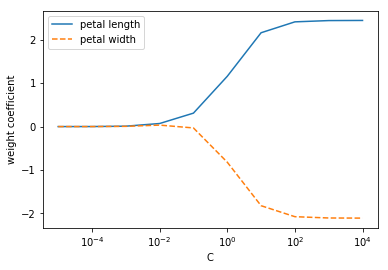

In [10]:
weigths, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weigths.append(lr.coef_[1])
    params.append(10.**c)
    
weigths = np.array(weigths)
plt.plot(params, weigths[:, 0], label='petal length')
plt.plot(params, weigths[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

We fitted ten logistic regression models with different values for the inverse-regularization parameter C. we only collected the weight coefficients of class 1 versus all classifiers. As we can see, the weight coefficients shrink if we decrease parameter C, that is, if we increase the regularization strength.